### stratify (계층화, 계층추출)
랜덤하게 데이터를 뽑을때 각각의 데이터 셋들이 다른 비율의 케이스를 가지는 것을 개선.
데이터를 훈련용과 테스트용을 나눠주는데, 각 케이스별 데이터를 동등한 비율로 나눌수 있도록 한다.

Ex) 어떤 데이터에, 악성종양 10개, 양성종양 490개의 총 500개의 데이터 있다.
* 비-계층적 구조일때. (size=0.5)
    - train[악성 5, 양성 240] / test[악성 5, 양성 250]
    - train[악성 2, 양성 239] / test[악성 8, 양성 251]

* 계층적 구조일때. (size=0.5)
    - train[악성 5, 양성 245] / test[악성 5, 양성 245]

# 선형모델 (Linear Model)
수업노트 : ch02_01_02_linear_code_v10.html
* 특성(feature) 하나이면 -> 직선(line)
* 특성 2개이면 -> 면(plane)
* 특성 3개이면 -> 초평면(hyperplane)

### 학습을 통해 정해지는 값
* 특성이 1 개이면 -> y=w1*x+b
* 특성이 2 개이면 -> y=w1*x1 + w2*x2 + b...
* 모델이 예측하는 값은 : w1, w2, ... , b

### "보스턴 데이터 셋을 활용한 회귀 모델 만들기"

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [12]:
boston = load_boston()
X = boston.data # input
y = boston.target # output

print(X.shape, y.shape) # show X and y shapes
# (506, 13) (506) row=506, column=13

print(boston['feature_names'])
# ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[:5]

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064])

In [14]:
import pandas as pd
import numpy as np

In [18]:
dict_dat = {"실제값":y_test,
           "예측값":pred,
           "오차":y_test - pred,
           "Absolute Error": np.abs(y_test - pred),
           "Squared Error": (y_test - pred)**2,}

dat = pd.DataFrame(dict_dat)
dat

,실제값,예측값,오차,Absolute Error,Squared Error
0,23.6,28.838854,-5.238854,5.238854,27.445587
1,32.4,36.007833,-3.607833,3.607833,13.016458
2,13.6,15.083248,-1.483248,1.483248,2.200023
3,22.8,25.230909,-2.430909,2.430909,5.909318
4,16.1,18.878641,-2.778641,2.778641,7.720844
...,...,...,...,...,...
122,8.8,3.284209,5.515791,5.515791,30.423951
123,19.2,23.798796,-4.598796,4.598796,21.148926
124,25.3,25.733299,-0.433299,0.433299,0.187748
125,20.4,23.048156,-2.648156,2.648156,7.012731


In [17]:
### 3-3 추가 : MAE, MSE, RMSE

In [19]:
dict_dat = {"실제값":y_test,
           "예측값":pred,
           "오차":y_test - pred,
           "Absolute Error": np.abs(y_test - pred),
           "Squared Error": (y_test - pred)**2,
           "MAE": np.abs(y_test - pred).sum() / len(pred),
           "MSE": ((y_test - pred)**2).sum()/len(pred) ,
           "RMSE":(((y_test - pred)**2).sum()/len(pred))**0.5}

dat = pd.DataFrame(dict_dat)
dat

,실제값,예측값,오차,Absolute Error,Squared Error,MAE,MSE,RMSE
0,23.6,28.838854,-5.238854,5.238854,27.445587,3.06094,22.098695,4.700925
1,32.4,36.007833,-3.607833,3.607833,13.016458,3.06094,22.098695,4.700925
2,13.6,15.083248,-1.483248,1.483248,2.200023,3.06094,22.098695,4.700925
3,22.8,25.230909,-2.430909,2.430909,5.909318,3.06094,22.098695,4.700925
4,16.1,18.878641,-2.778641,2.778641,7.720844,3.06094,22.098695,4.700925
...,...,...,...,...,...,...,...,...
122,8.8,3.284209,5.515791,5.515791,30.423951,3.06094,22.098695,4.700925
123,19.2,23.798796,-4.598796,4.598796,21.148926,3.06094,22.098695,4.700925
124,25.3,25.733299,-0.433299,0.433299,0.187748,3.06094,22.098695,4.700925
125,20.4,23.048156,-2.648156,2.648156,7.012731,3.06094,22.098695,4.700925


In [29]:
# 3-4 추가 : 데이터 분리 비율 (9:1, 8:2, 7:3)

for i in range(1, 6, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i/10), random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred[:5]
    
    mae = np.abs(y_test - pred).sum() / len(pred)
    mse = ((y_test - pred)**2).sum()/len(pred)
    rmse = (((y_test - pred)**2).sum()/len(pred))**0.5
    
    print("test_size : ",(i/10))
    print("MAE : {:.3f}".format(mae))
    print("MSE : {:.3f}".format(mse))
    print("RMSE : {:.3f}".format(rmse))
    print("")

test_size :  0.1
MAE : 2.834
MSE : 14.996
RMSE : 3.872

test_size :  0.2
MAE : 3.189
MSE : 24.291
RMSE : 4.929

test_size :  0.3
MAE : 3.163
MSE : 21.517
RMSE : 4.639

test_size :  0.4
MAE : 3.298
MSE : 21.833
RMSE : 4.673

test_size :  0.5
MAE : 3.398
MSE : 25.175
RMSE : 5.018



### 회귀모델에서 score는 결정계수라는 것을 의미한다.
* 결정계수는 회귀모델에서 모델의 적합도를 의미하는 것으로 0~1 사이의 값을 갖는다.
* 1에 가까울수록 모델이 잘 fitting 되었다. 라고 할 수 있다.

### 과적합. Over Fitting
* 데이터에 대해서는 잘 훈련된 모델이지만 새로운 데이터에의 예측은 꽝.

* 대안 2가지
    - LASSO 회귀
    - Ridge 회귀

In [32]:
import mglearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.linear_model import Ridge   # 릿지회귀
import pandas as pd

In [35]:
boston = load_boston()
X = boston.data # input
y = boston.target # output

print(X.shape, y.shape) # show X and y shapes
# (506, 13) (506) row=506, column=13

(506, 13) (506,)


### PolynomialFeatures 메서드
- boston dataset의 13개 columns을 가지고 랜덤한 여러개의 변수 만들기

In [37]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [38]:
### 데이터 셋 준비 
boston = load_boston()  # 데이터 셋 불러오기
print(type(boston.target), type(boston.data))
print(boston.target.shape, boston.data.shape)

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(506,) (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### target을 예측하는 모델 만들기 (feat. 과적합 개선)

In [40]:
# Normalization 하기 전 데이터 보기

# Set data X and y
X = df_boston.loc[:,'CRIM':'LSTAT']
y = boston['target']

print("pre-Normalization dataset : ", X.shape, y.shape)

pre-Normalization dataset :  (506, 13) (506,)


### Flow
- 데이터 확장
- 모델 선택
- 모델 학습
- 모델 예측
- 예측 결과 평가

In [42]:
import numpy as np

In [46]:
# 데이터 확장
norm_x = MinMaxScaler().fit_transform(X) # 값을 0 ~ 1사이로 만드는 메서드

# norm_x
print(np.min(norm_x), np.max(norm_x)) # norm_x 최소, 최대를 보면, 0 and 1 사이로 변경되었음을 알 수 있다.

# 변수의 확장
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(norm_x)
print(ex_X.shape, y.shape) # (506, 104) (506,)

# 변수가 13개 였는데 104개가 되었음.

0.0 1.0
(506, 104) (506,)


In [47]:
# 선형회귀
from sklearn.linear_model import LinearRegression

In [51]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("학습용 데이터 셋의 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 셋의 점수 : {:.2f}".format(lr.score(X_test, y_test)))

# 학습용 데이터 셋의 점수 : 0.94
# 테스트 데이터 셋의 점수 : 0.78

# train 스코어가 0.94에서 test에서 0.78로 줄었는데 --> 훈련데이터 모델이 과적합되었음을 알 수 있음.

학습용 데이터 셋의 점수 : 0.94
테스트 데이터 셋의 점수 : 0.78


## 과적합 개선하기 !

### L2 규제 (using... Ridge Regression)

In [54]:
lr1 = Ridge().fit(X_train, y_train)

print("학습용 데이터 셋의 점수 : {:.2f}".format(lr1.score(X_train, y_train)))
print("테스트 데이터 셋의 점수 : {:.2f}".format(lr1.score(X_test, y_test)))

# 학습용 데이터 셋의 점수 : 0.87
# 테스트 데이터 셋의 점수 : 0.81

# train 스코어와 test 스코어의 스코어의 gap이 줄었다 --> '조금 더 일반화 되었다'라고 볼 수 있음.

학습용 데이터 셋의 점수 : 0.87
테스트 데이터 셋의 점수 : 0.81


### 4-3 Ridge method 알파 계수 변경하기
* alpha: 0.0001, 0.001, 0.01, 0.1, 1, 10, 100

In [56]:
# Exercise 4-1
for i in (0.0001, 0.001, 0.01, 0.1, 1, 10, 100):
    lr1 = Ridge(alpha=i).fit(X_train, y_train)
    
    print("알파값 : ", i)
    print("학습용 데이터 셋의 점수 : {:.2f}".format(lr1.score(X_train, y_train)))
    print("테스트 데이터 셋의 점수 : {:.2f}".format(lr1.score(X_test, y_test)))
    print("")
    
    # alpha 100 부터는.. 과소적합이라 볼 수 있겠다.

알파값 :  0.0001
학습용 데이터 셋의 점수 : 0.94
테스트 데이터 셋의 점수 : 0.79

알파값 :  0.001
학습용 데이터 셋의 점수 : 0.94
테스트 데이터 셋의 점수 : 0.81

알파값 :  0.01
학습용 데이터 셋의 점수 : 0.94
테스트 데이터 셋의 점수 : 0.81

알파값 :  0.1
학습용 데이터 셋의 점수 : 0.92
테스트 데이터 셋의 점수 : 0.82

알파값 :  1
학습용 데이터 셋의 점수 : 0.87
테스트 데이터 셋의 점수 : 0.81

알파값 :  10
학습용 데이터 셋의 점수 : 0.77
테스트 데이터 셋의 점수 : 0.73

알파값 :  100
학습용 데이터 셋의 점수 : 0.56
테스트 데이터 셋의 점수 : 0.55



In [ ]:
# Exercise 4-1++ plot
import matplotlib.pyplot as plt
%matplotlib inline

회귀계수의 최대, 최소 :  -1820.7193438802144 1422.7485462663753
회귀계수의 최대, 최소 :  -19.671903528732866 26.23617254240992


TypeError: can only concatenate str (not "float") to str

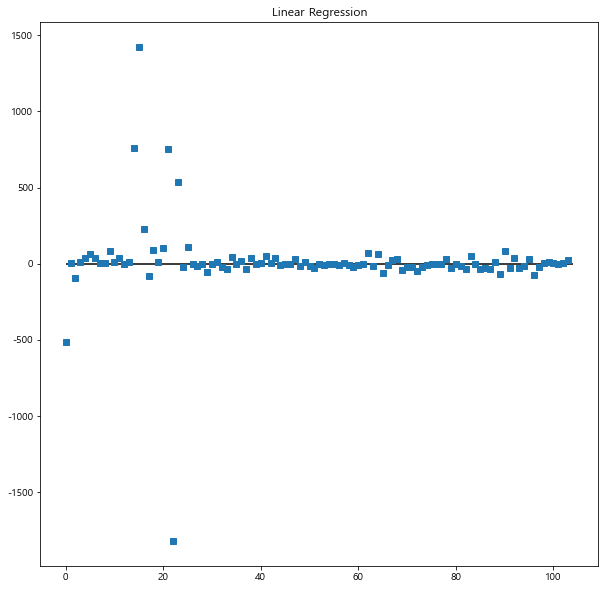

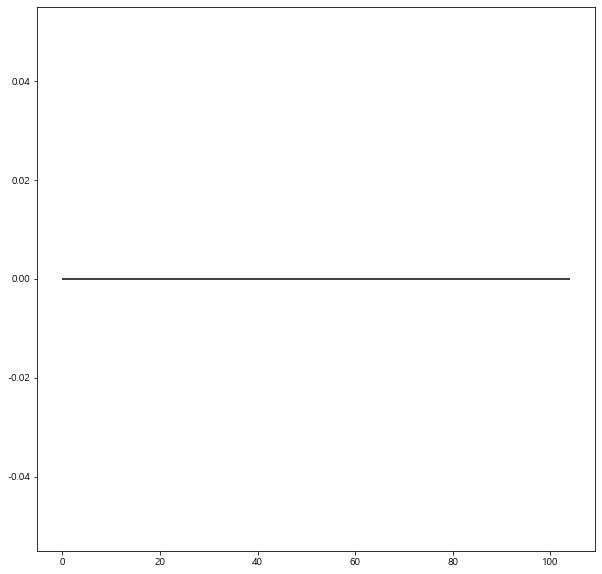

In [65]:
print("회귀계수의 최대, 최소 : ", np.min(lr.coef_), np.max(lr.coef_))
lr = LinearRegression().fit(X_train, y_train)
fig = plt.figure(figsize=(10,10))
plt.hlines(0, 0, len(lr.coef_))
plt.plot(lr.coef_, 's')
plt.title('Linear Regression')

for i in (0.0001, 0.001, 0.01, 0.1, 1, 10, 100):
    lr1 = Ridge(alpha=0.1).fit(X_train, y_train)

    print("회귀계수의 최대, 최소 : ", np.min(lr1.coef_), np.max(lr1.coef_))
    fig = plt.figure(figsize=(10,10))
    plt.hlines(0, 0, len(lr1.coef_))
    
    label=["alpha"+i]
    label+=label
    
    plt.plot(lr1.coef_, 's', label=label)
    plt.title(label)

In [ ]:
for i in (0.0001, 0.001, 0.01, 0.1, 1, 10, 100):
    lr1 = Ridge(alpha=i).fit(X_train, y_train)
    
    print("알파값 : ", i)
    print("학습용 데이터 셋의 점수 : {:.2f}".format(lr1.score(X_train, y_train)))
    print("테스트 데이터 셋의 점수 : {:.2f}".format(lr1.score(X_test, y_test)))
    print("")
    
    # alpha 100 부터는.. 과소적합이라 볼 수 있겠다.

for i in range(1, 6, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i/10), random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred[:5]
    
    mae = np.abs(y_test - pred).sum() / len(pred)
    mse = ((y_test - pred)**2).sum()/len(pred)
    rmse = (((y_test - pred)**2).sum()/len(pred))**0.5
    
    print("test_size : ",(i/10))
    print("MAE : {:.3f}".format(mae))
    print("MSE : {:.3f}".format(mse))
    print("RMSE : {:.3f}".format(rmse))
    print("")